In [ ]:
# Probability

import random

def rollDie():
    return random.choice([1,2,3,4,5,6])

def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    return result

print rollN(5)

def getTarget(goal):
    numTries = 0
    numRolls = len(goal)
    while True:
        numTries += 1
        result = rollN(numRolls)
        if result == goal:
            return numTries

def runSim(goal, numTrials):
    total = 0
    for i in range(numTrials):
        total += getTarget(goal)
    print 'Average number of tries =', total/float(numTrials)

##runSim('11111', 100)
##runSim('54324', 100)

def atLeastOneOne(numRolls, numTrials):
    numSuccess = 0
    for i in range(numTrials):
        rolls = rollN(numRolls)
        if '1' in rolls:
            numSuccess += 1
        fracSuccess = numSuccess/float(numTrials)
    print fracSuccess

atLeastOneOne(10, 1000)

In [ ]:
# Hashing

import random

def strToInt(s):
    number = ''
    for c in s:
        number = number + str(ord(c))
    index = int(number)
    return index

#print 'Index =', strToInt('a')
#print 'Index =', strToInt('John is a cool dude')

def hashStr(s, tableSize = 101):
    number = ''
    for c in s:
        number = number + str(ord(c))
    index = int(number)%tableSize
    return index

##print hashStr('a')
##print hashStr('John is a cool dude')


print hashStr('Eric', 7)
print hashStr('Chris', 7)
print hashStr('Sarina', 7)


print hashStr('Jill', 7)


In [ ]:
# Hash tables

import random

class intDict(object):
    """A dictionary with integer keys"""
    
    def __init__(self, numBuckets):
        """Create an empty dictionary"""
        self.buckets = []
        self.numBuckets = numBuckets
        for i in range(numBuckets):
            self.buckets.append([])
            
    def addEntry(self, dictKey, dictVal):
        """Assumes dictKey an int.  Adds an entry."""
        hashBucket = self.buckets[dictKey%self.numBuckets]
        for i in range(len(hashBucket)):
            if hashBucket[i][0] == dictKey:
                hashBucket[i] = (dictKey, dictVal)
                return
        hashBucket.append((dictKey, dictVal))
        
    def getValue(self, dictKey):
        """Assumes dictKey an int.  Returns entry associated
           with the key dictKey"""
        hashBucket = self.buckets[dictKey%self.numBuckets]
        for e in hashBucket:
            if e[0] == dictKey:
                return e[1]
        return None
    
    def __str__(self):
        res = '{'
        for b in self.buckets:
            for t in b:
                res = res + str(t[0]) + ':' + str(t[1]) + ','
        return res[:-1] + '}' #res[:-1] removes the last comma


D = intDict(29)
for i in range(20):
    #choose a random int in range(10**5)
    key = random.choice(range(10**5))
    D.addEntry(key, i)

print '\n', 'The buckets are:'
for hashBucket in D.buckets: #violates abstraction barrier
    print '  ', hashBucket

In [ ]:
# Calculating the probability of collision

import random

class intDict(object):
    """A dictionary with integer keys"""
    
    def __init__(self, numBuckets):
        """Create an empty dictionary"""
        self.buckets = []
        self.numBuckets = numBuckets
        for i in range(numBuckets):
            self.buckets.append([])
            
    def addEntry(self, dictKey, dictVal):
        """Assumes dictKey an int.  Adds an entry."""
        hashBucket = self.buckets[dictKey%self.numBuckets]
        for i in range(len(hashBucket)):
            if hashBucket[i][0] == dictKey:
                hashBucket[i] = (dictKey, dictVal)
                return
        hashBucket.append((dictKey, dictVal))
        
    def getValue(self, dictKey):
        """Assumes dictKey an int.  Returns entry associated
           with the key dictKey"""
        hashBucket = self.buckets[dictKey%self.numBuckets]
        for e in hashBucket:
            if e[0] == dictKey:
                return e[1]
        return None
    
    def __str__(self):
        res = '{'
        for b in self.buckets:
            for t in b:
                res = res + str(t[0]) + ':' + str(t[1]) + ','
        return res[:-1] + '}' #res[:-1] removes the last comma

    
def collision_prob(numBuckets, numInsertions):
    '''
    Given the number of buckets and the number of items to insert, 
    calculates the probability of a collision.
    '''
    prob = 1.0
    for i in range(1, numInsertions):
        prob = prob * ((numBuckets - i) / float(numBuckets))
    return 1 - prob

def sim_insertions(numBuckets, numInsertions):
    '''
    Run a simulation for numInsertions insertions into the hash table.
    '''
    choices = range(numBuckets)
    used = []
    for i in range(numInsertions):
        hashVal = random.choice(choices)
        if hashVal in used:
            return False
        else:
            used.append(hashVal)
    return True

def observe_prob(numBuckets, numInsertions, numTrials):
    '''
    Given the number of buckets and the number of items to insert, 
    runs a simulation numTrials times to observe the probability of a collision.
    '''
    probs = []
    for t in range(numTrials):
        probs.append(sim_insertions(numBuckets, numInsertions))
    return 1 - sum(probs)/float(numTrials)


def main():
    hash_table = intDict(25)
    hash_table.addEntry(15, 'a')
#    random.seed(1) # Uncomment for consistent results
    for i in range(20):
       hash_table.addEntry(int(random.random() * (10 ** 9)), i)
    hash_table.addEntry(15, 'b')
    print hash_table.buckets  #evil
    print '\n', 'hash_table =', hash_table
    print hash_table.getValue(15)


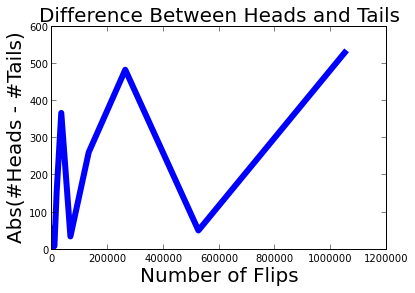

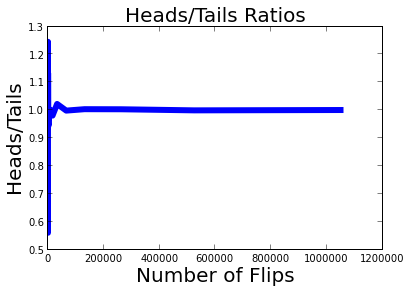

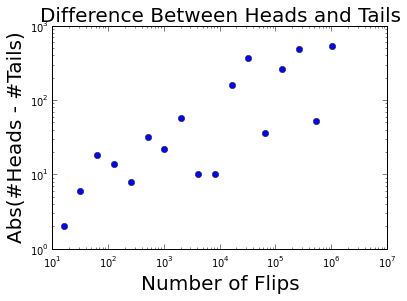

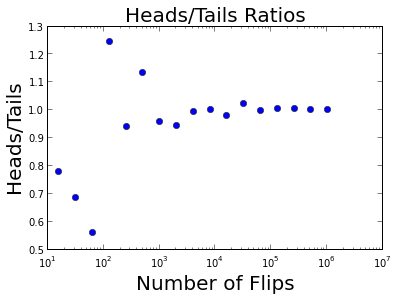

In [1]:
# Stochastic Programming
# Law of Large Numbers

import random, pylab
#set line width
pylab.rcParams['lines.linewidth'] = 6
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.major.size'] = 5
#set size of numbers on y-axis
pylab.rcParams['ytick.major.size'] = 5


def flip(numFlips):
    heads = 0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1
    return heads/float(numFlips)


def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp positive integers; minExp < maxExp
       Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs)
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.plot(xAxis, ratios)

##random.seed(0)
##flipPlot(4, 20)
##pylab.show()


def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp positive integers; minExp < maxExp
       Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs)
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.plot(xAxis, ratios)
    #Additional code to produce different plots from the
    #same data
    pylab.figure()
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'bo')
    pylab.semilogx()
    pylab.semilogy()
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.plot(xAxis, ratios, 'bo')
    pylab.semilogx()
    
random.seed(0)
flipPlot(4, 20)
pylab.show()

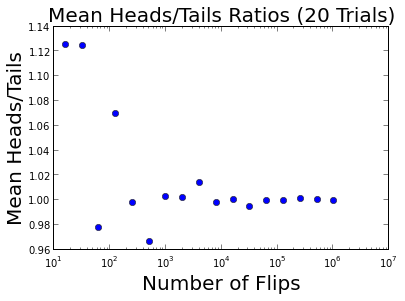

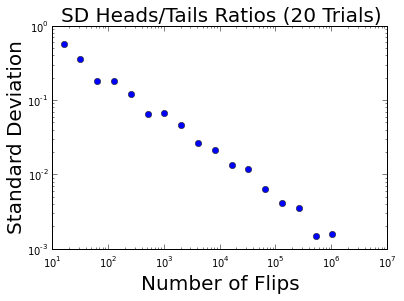

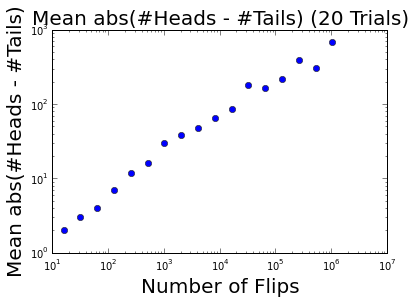

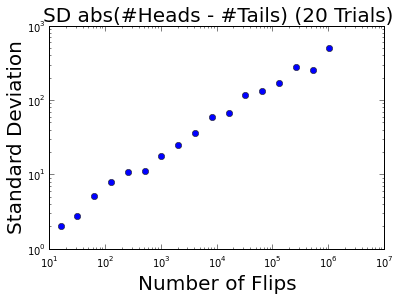

In [3]:
# Calculating the Standard Deviation

import random, pylab
#set line width
pylab.rcParams['lines.linewidth'] = 6
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.major.size'] = 5
#set size of numbers on y-axis
pylab.rcParams['ytick.major.size'] = 5

def stdDev(X):
    try:
        mean = sum(X)/float(len(X))
        tot = 0.0
        for x in X:
            tot += (x - mean)**2
        return (tot/len(X))**0.5
    except ZeroDivisionError:
        return float('NaN')


def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.random() < 0.5:
            numHeads += 1
    numTails = numFlips - numHeads
    return numHeads, numTails

def flipPlot(minExp, maxExp, numTrials):
    meanRatios = []
    meanDiffs = []
    ratiosSDs =  []
    diffsSDs =  []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        meanRatios.append(sum(ratios)/numTrials)
        meanDiffs.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    pylab.plot(xAxis, meanRatios, 'bo')
    pylab.title('Mean Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Mean Heads/Tails')
    pylab.semilogx()
    pylab.figure()
    pylab.plot(xAxis, ratiosSDs, 'bo')
    pylab.title('SD Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Standard Deviation')
    pylab.semilogx()
    pylab.semilogy()

##flipPlot(4, 20, 20)
##pylab.show()

def flipPlot2(minExp, maxExp, numTrials):
    meanRatios = []
    meanDiffs = []
    ratiosSDs =  []
    diffsSDs =  []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        meanRatios.append(sum(ratios)/numTrials)
        meanDiffs.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    pylab.plot(xAxis, meanRatios, 'bo')
    pylab.title('Mean Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Mean Heads/Tails')
    pylab.semilogx()
    pylab.figure()
    pylab.plot(xAxis, ratiosSDs, 'bo')
    pylab.title('SD Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Standard Deviation')
    pylab.semilogx()
    pylab.semilogy()
    #Additional code to look at difference in abolute
    #number of heads and tails
    pylab.figure()
    pylab.title('Mean abs(#Heads - #Tails) ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Mean abs(#Heads - #Tails)')
    pylab.plot(xAxis, meanDiffs, 'bo')
    pylab.semilogx()
    pylab.semilogy()
    pylab.figure()
    pylab.plot(xAxis, diffsSDs, 'bo')
    pylab.title('SD abs(#Heads - #Tails) ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Standard Deviation')
    pylab.semilogx()
    pylab.semilogy()

flipPlot2(4, 20, 20)
pylab.show()

In [ ]:
# L4 PROBLEM 3  (5 points possible)
# Write a function, stdDevOfLengths(L) that takes in a list of strings, L, and outputs the standard deviation of the 
# lengths of the strings. Return float('NaN') if L is empty.
# 
# Recall that the standard deviation is computed by this equation:
# 
# \begin{equation}
#    \sqrt{\frac{\sum_{t\ in\ X} (t - \mu)^2}{N}}
# \end{equation}
# 
# where:
# 
# - $\mu$ is the mean of the elements in $X$.
# - $\sum_{t\ in\ X} (t - \mu)^2$ means the sum of the quantity $(t - \mu)^2$ for t in $X$.
# -That is, for each element (that we name $t$) in the set $X$, we compute the quantity $(t - \mu)^2$. We then sum up 
# all those computed quantities.
# - $N$ is the number of elements in $X$.
# 
# Test case: If L = ['a', 'z', 'p'], stdDevOfLengths(L) should return 0.
# Test case: If L = ['apples', 'oranges', 'kiwis', 'pineapples'], stdDevOfLengths(L) should return 1.8708.

import math

def stdDevOfLengths(L):
    """
    L: a list of strings

    returns: float, the standard deviation of the lengths of the strings,
      or NaN if L is empty.
    """
    N = len(L)
    if N == 0:
        return float('NaN')
    mu = 0.0
    for el in L:
        mu += len(el)
    mu /= N
    
    t_mu = 0.0
    for el in L:
        t_mu += (len(el)-mu)**2
    t_mu /= N
        
    return math.sqrt(t_mu)
    
    
L = ['apples', 'oranges', 'kiwis', 'pineapples']
print stdDevOfLengths(L)


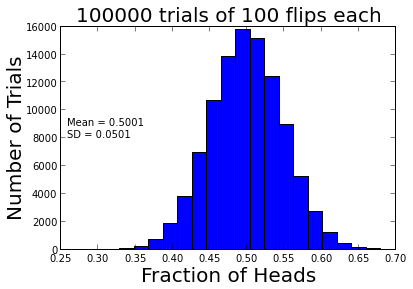

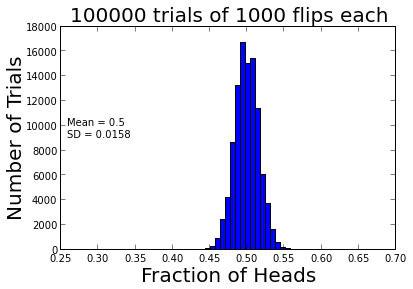

In [2]:
import random, pylab

#set line width
pylab.rcParams['lines.linewidth'] = 6
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.major.size'] = 5
#set size of numbers on y-axis
pylab.rcParams['ytick.major.size'] = 5

def stdDev(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return (tot/len(X))**0.5

##vals = []
##for i in range(100000):
##    num = random.random()
##    vals.append(num)
##pylab.hist(vals, bins = 11)
##xmin, xmax = pylab.xlim()
##ymin, ymax = pylab.ylim()
##print 'x-range =', xmin, '-', xmax
##print 'y-range =', ymin, '-', ymax
##pylab.figure
##pylab.hist(vals, bins = 11)
###pylab.xlim(-1.0, 2.0)
##pylab.show()
##assert False

def flip(numFlips):
    heads = 0.0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1.0
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + ' trials of '
                + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    pylab.text(xmin + (xmax-xmin)*0.02, (ymax-ymin)/2,
               'Mean = ' + str(round(mean, 4))
               + '\nSD = ' + str(round(sd, 4)))

def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins = 21)
    xmin,xmax = pylab.xlim()
    ymin,ymax = pylab.ylim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure()
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 21)
    pylab.xlim(xmin, xmax)
    ymin, ymax = pylab.ylim()
    labelPlot(numFlips2, numTrials, mean2, sd2)

pylab.seed(0)    
makePlots(100,1000,100000)
pylab.show()

In [3]:
# L4 PROBLEM 4  (4 points possible)
# The coefficient of variation is the standard deviation divided by the mean. Loosely, it's a measure of how variable 
# the population is in relation to the mean.
#
# Compute the coefficient of variation of [10, 4, 12, 15, 20, 5] to 3 decimal places.

def coefficient_variation(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    stdev = (tot/len(X))**0.5
    return round(stdev/mean, 3)
    
    
L = [10, 4, 12, 15, 20, 5]
print coefficient_variation(L)

0.503


Loading word list from file...
   83667 words loaded.


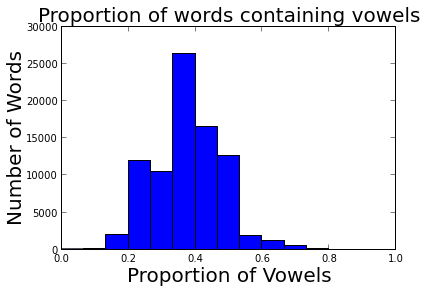

In [5]:
# L4 PROBLEM 5  (5 points possible)
# The file /home/roger/Workspace/MOOC/edx/MITx/6.00.2x/L4P5.zip contains words.txt, a list of words, and histogramfun.py, 
# a template for a histogram function. 
# In this problem, you will be writing code to plot a histogram of the proportion of vowels in each word of a given 
# wordList. Vowels are 'A', 'E', 'I', 'O', 'U'.
# 
# Make sure to put a title and appropriate labels on the plot.
# 
# When you have produced a plot, answer the following question, to check your solution and your understanding of it.
# 
# Using the code you wrote to investigate, do more words in the word list have a vowel proportion greater than or less than 0.5?

import pylab

# You may have to change this path
WORDLIST_FILENAME = "/home/roger/Workspace/MOOC/edx/MITx/6.00.2x/L4P5/words.txt"

def loadWords():
    """
    Returns a list of valid words. Words are strings of uppercase letters.
    
    Depending on the size of the word list, this function may
    take a while to finish.
    """
    print "Loading word list from file..."
    # inFile: file
    inFile = open(WORDLIST_FILENAME, 'r', 0)
    # wordList: list of strings
    wordList = []
    for line in inFile:
        wordList.append(line.strip().lower())
    print "  ", len(wordList), "words loaded."
    return wordList

def plotVowelProportionHistogram(wordList, numBins=15):
    """
    Plots a histogram of the proportion of vowels in each word in wordList
    using the specified number of bins in numBins
    """
    vowels = 'aeiou'
    vowelsProportion = []
    for word in wordList:
        count = 0
        for w in word:
            if w in vowels:
                count += 1
        proportion = float(count)/len(word)
        vowelsProportion.append(proportion)

    pylab.hist(vowelsProportion, numBins)
    pylab.title('Proportion of words containing vowels')
    pylab.xlabel('Proportion of Vowels')
    pylab.ylabel('Number of Words')
    pylab.seed(0)    
    pylab.show()
    
wordList = loadWords()
plotVowelProportionHistogram(wordList)